1. To provide sales insights that are not visible before for the sales team for decision support.
 Just follow along and complete the tasks outlined below.
 Finding 5 sales insights of sales for products:
 1. Sales trends.
 2. Top 5products by sales.
 3. 5mostselling products in terms of quantity.
 4. The most commonly used modeofshipment.
 5. The most profitable categories and subcategories.
 Optional Tasks:
 6. Store the dataset into a database management system like MySQL or PostgreSQL.
 7. Build a dashboar

In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<div style="display: flex; align-items: center;">
  <!-- SVG Logo -->
  <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 128 128" style="width: 32px; height: 32px; margin-right: 10px;">
    <path style="-inkscape-stroke:none" d="M48.697 15.176h12.25v25.437h-12.25zm0 52.251h12.25v25.436h-12.25z" color="#000" fill="#130754"/>
    <path style="-inkscape-stroke:none" d="M48.697 48.037h12.25v12.001h-12.25z" color="#000" fill="#ffca00"/>
    <path style="-inkscape-stroke:none" d="M29.017 36.087h12.25v84.552h-12.25zM67.97 88.414h12.25v25.436H67.97zm0-52.297h12.25v25.437H67.97z" color="#000" fill="#130754"/>
    <path style="-inkscape-stroke:none" d="M67.97 68.983h12.25v12.001H67.97z" color="#000" fill="#e70488"/>
    <path style="-inkscape-stroke:none" d="M87.238 8.55h12.25v84.552h-12.25z" color="#000" fill="#130754"/>
  </svg>
  
  <!-- Heading -->
  <h1 style="margin: 0;">Loading into Pandas</h1>
</div>


In [2]:
import pandas as pd

# Load the Excel file to analyze the data
file_path = '/work/1-sales_records.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
data.sheet_names

['Orders', 'Returns', 'Person']

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
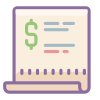
<h1>Order Data</h1>

## 🛒Display Order Data

In [3]:
# Load the 'Orders' sheet to inspect its structure and contents
orders_data = data.parse('Orders')

# Display the first few rows to understand the data
orders_data.head(), orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

(          order_id order_date  ship_date       ship_mode    customer_name  \
 0     AG-2019-2040 2019-01-01 2019-01-06  Standard Class  Toby Braunhardt   
 1    IN-2019-47883 2019-01-01 2019-01-08  Standard Class      Joseph Holt   
 2     HU-2019-1220 2019-01-01 2019-01-05    Second Class    Annie Thurman   
 3  IT-2019-3647632 2019-01-01 2019-01-05    Second Class     Eugene Moren   
 4    IN-2019-47883 2019-01-01 2019-01-08  Standard Class      Joseph Holt   
 
        segment            state    country  market   region  ...  \
 0     Consumer      Constantine    Algeria  Africa   Africa  ...   
 1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
 3  Home Office        Stockholm     Sweden      EU    North  ...   
 4     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 
           category sub_category                 product_name    sales  \
 0  Office Supplies      Storage        

<div style="background-color: #051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
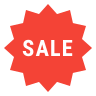

## 💶💷💵 Sale Trends

Sales Trends:

2019: $2.26M
2020: $2.68M
2021: $3.41M
2022: $4.30M
Sales have been steadily increasing year over year.

In [4]:
# 1. Sales Trends: Aggregating sales by year
sales_trends = orders_data.groupby('year')['sales'].sum()

sales_trends

year
2019    2.259451e+06
2020    2.677439e+06
2021    3.405746e+06
2022    4.299866e+06
Name: sales, dtype: float64

<div style="background-color: #FF0001; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
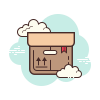

## 🛍️ Ranking Products by Sales

Top 5 Products by Sales:

Apple Smart Phone, Full Size: $86,936.78
Cisco Smart Phone, Full Size: $76,441.53
Motorola Smart Phone, Full Size: $73,156.30
Nokia Smart Phone, Full Size: $71,904.56
Canon imageCLASS 2200 Advanced Copier: $61,599.82

In [5]:
# 2. Top 5 products by sales
top_5_products_sales = orders_data.groupby('product_name')['sales'].sum().nlargest(5)

top_5_products_sales

product_name
Apple Smart Phone, Full Size             86935.7786
Cisco Smart Phone, Full Size             76441.5306
Motorola Smart Phone, Full Size          73156.3030
Nokia Smart Phone, Full Size             71904.5555
Canon imageCLASS 2200 Advanced Copier    61599.8240
Name: sales, dtype: float64

<div style="background-color: #051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
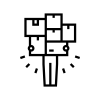

## 📸 Most Sold Products by Quantity

Top 5 Most Sold Products by Quantity:

Staples: 876 units
Cardinal Index Tab, Clear: 337 units
Eldon File Cart, Single Width: 321 units
Rogers File Cart, Single Width: 262 units
Sanford Pencil Sharpener, Water Color: 259 units

In [6]:
# 3. Top 5 most sold products by quantity
top_5_products_quantity = orders_data.groupby('product_name')['quantity'].sum().nlargest(5)

top_5_products_quantity

product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Name: quantity, dtype: int64

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
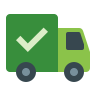


## 🚢🛳️ Most Common Mode of Shipment

Most Common Mode of Shipment:

Standard Class is the most frequently used shipping mode.

In [7]:
# 4. Most commonly used mode of shipment
most_common_ship_mode = orders_data['ship_mode'].value_counts().idxmax()

most_common_ship_mode

'Standard Class'

<div style="background-color: #051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
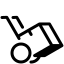

## ✅🛫 Profitable Categories and Subcategories

Most Profitable Categories and Subcategories:

Technology > Copiers: $258,567.55
Technology > Phones: $216,717.01
Furniture > Bookcases: $161,924.42
Furniture > Chairs: $141,973.80
Office Supplies > Appliances: $141,680.59

In [8]:
# 5. Most profitable categories and subcategories
profitability = orders_data.groupby(['category', 'sub_category'])['profit'].sum().sort_values(ascending=False)
top_profitable_categories = profitability.head(5)

top_profitable_categories


category         sub_category
Technology       Copiers         258567.54818
                 Phones          216717.00580
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
Office Supplies  Appliances      141680.58940
Name: profit, dtype: float64

In [9]:
!pip install python-dotenv


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv("secret.env") 

user = os.getenv("User")
db = os.getenv("DB")
password = os.getenv("Password")
host = os.getenv("Host")

### Configure and Dependency 

In [11]:
%%sh
python3 -m pip install pymysql
python3 -m pip install cryptography


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Cleanse Data Before Ingesting in DataBase

In [12]:
person_data = data.parse('Person')
person_data["customer_data"] = person_data.rename(columns={"person": "customer_name"})["Person"]
person_data.drop("Person", axis=1, inplace=True)
person_data

,Region,customer_data
0,Central,Anna Andreadi
1,South,Chuck Magee
2,East,Kelly Williams
3,West,Matt Collister
4,Africa,Deborah Brumfield
5,AMEA,Larry Hughes
6,Canada,Nicole Hansen
7,Caribbean,Giulietta Dortch
8,Central Asia,Nora Preis
9,North,Jack Lebron


In [13]:
# Rename the 'Order ID' column in the 'Returns' sheet data to 'order_id'
return_data = data.parse('Returns')
return_data.rename(columns={'Order ID': 'order_id'}, inplace=True)

# Generate primary key for Returns table
return_data['return_id'] = range(1, len(return_data) + 1)
return_data

,Returned,order_id,Market,return_id
0,Yes,MX-2021-168137,LATAM,1
1,Yes,US-2019-165316,LATAM,2
2,Yes,ES-2021-1525878,EU,3
3,Yes,CA-2021-118311,United States,4
4,Yes,ES-2019-1276768,EU,5
...,...,...,...,...
1168,Yes,ES-2021-2639112,EU,1169
1169,Yes,CA-2022-134194,United States,1170
1170,Yes,ES-2020-3246286,EU,1171
1171,Yes,ES-2020-4379168,EU,1172


<svg version="1.1" id="Layer_1" xmlns:x="ns_extend;" xmlns:i="ns_ai;" xmlns:graph="ns_graphs;" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px" viewBox="0 0 174.6 43" style="enable-background:new 0 0 174.6 43;" xml:space="preserve">
 <style type="text/css">
  .st0{fill:#FFFFFF;}
	.st1{fill:url(#SVGID_1_);}
	.st2{fill:url(#SVGID_2_);}
	.st3{fill:url(#SVGID_3_);}
	.st4{fill:url(#SVGID_4_);}
	.st5{fill:url(#SVGID_5_);}
	.st6{fill:url(#SVGID_6_);}
	.st7{fill:url(#SVGID_7_);}
	.st8{fill:url(#SVGID_8_);}
	.st9{fill:url(#SVGID_9_);}
 </style>
 <metadata>
  <sfw xmlns="ns_sfw;">
   <slices>
   </slices>
   <sliceSourceBounds bottomLeftOrigin="true" height="43" width="174.6" x="-17.2" y="2">
   </sliceSourceBounds>
  </sfw>
 </metadata>
 <g>
  <path class="st0" d="M76.2,11.9c1.9,0,3.5,0.2,4.7,0.7c1.3,0.5,2.3,1.1,3.1,2c0.8,0.9,1.3,1.9,1.6,3.1c0.3,1.2,0.5,2.5,0.5,4v14.8
		c-0.9,0.2-2.2,0.4-4,0.7c-1.8,0.3-3.8,0.4-6,0.4c-1.4,0-2.8-0.1-4-0.4c-1.2-0.3-2.2-0.7-3.1-1.4c-0.9-0.6-1.5-1.4-2-2.4
		c-0.5-1-0.7-2.2-0.7-3.7c0-1.4,0.3-2.6,0.8-3.6c0.6-1,1.3-1.8,2.2-2.4c0.9-0.6,2-1.1,3.3-1.3c1.2-0.3,2.5-0.4,3.9-0.4
		c0.6,0,1.3,0,2,0.1c0.7,0.1,1.4,0.2,2.2,0.4v-0.9c0-0.6-0.1-1.3-0.2-1.9c-0.2-0.6-0.4-1.1-0.8-1.6c-0.4-0.5-0.9-0.8-1.6-1.1
		c-0.6-0.3-1.4-0.4-2.4-0.4c-1.3,0-2.5,0.1-3.6,0.3c-1.1,0.2-2,0.4-2.7,0.6l-0.7-4.6c0.7-0.3,1.8-0.5,3.1-0.8
		C73.2,12.1,74.6,11.9,76.2,11.9L76.2,11.9z M76.7,33.1c1.8,0,3.1-0.1,4-0.3v-6.3c-0.3-0.1-0.8-0.2-1.4-0.3c-0.6-0.1-1.3-0.1-2-0.1
		c-0.6,0-1.3,0-1.9,0.1c-0.6,0.1-1.2,0.3-1.7,0.5c-0.5,0.3-0.9,0.6-1.3,1.1c-0.3,0.5-0.5,1-0.5,1.7c0,1.4,0.4,2.3,1.3,2.8
		C74.1,32.8,75.2,33.1,76.7,33.1z M98.5,5.4c0,1.1-0.3,1.9-1,2.6S96,8.8,95,8.8c-1,0-1.8-0.3-2.5-0.9c-0.7-0.6-1-1.4-1-2.6
		s0.3-1.9,1-2.6c0.7-0.6,1.5-0.9,2.5-0.9c0.9,0,1.8,0.3,2.4,0.9C98.1,3.4,98.5,4.3,98.5,5.4z M97.9,37.1h-5.7V12.6h5.7V37.1z
		 M111.4,37.1c-1.6-3.2-3.2-6.9-4.8-11.1c-1.6-4.2-3.1-8.7-4.5-13.4h6.1c0.3,1.4,0.8,2.9,1.2,4.4c0.5,1.6,0.9,3.2,1.4,4.7
		c0.5,1.6,1.1,3.1,1.6,4.6c0.6,1.5,1.1,2.8,1.5,4c0.5-1.2,1-2.5,1.5-4c0.5-1.5,1.1-3,1.6-4.6c0.5-1.6,1-3.2,1.5-4.7
		c0.5-1.6,0.9-3,1.2-4.4h5.8c-1.4,4.8-2.9,9.3-4.5,13.4c-1.6,4.2-3.3,7.9-4.8,11.1C116.3,37.1,111.4,37.1,111.4,37.1z M126.9,24.9
		c0-2.1,0.3-4,1-5.7c0.6-1.6,1.5-3,2.6-4.1c1.1-1.1,2.3-1.9,3.7-2.4c1.4-0.6,2.8-0.8,4.2-0.8c3.4,0,6,1.1,7.9,3.1
		c1.9,2.1,2.9,5.2,2.9,9.4c0,0.3,0,0.6,0,1.1c0,0.4,0,0.7-0.1,1.1h-16.2c0.2,2,0.9,3.5,2.1,4.6c1.2,1.1,3,1.6,5.3,1.6
		c1.4,0,2.6-0.1,3.8-0.4c1.1-0.3,2.1-0.5,2.7-0.8l0.8,4.6c-0.3,0.2-0.7,0.3-1.3,0.5s-1.1,0.3-1.9,0.5c-0.7,0.1-1.4,0.3-2.3,0.4
		c-0.8,0.1-1.6,0.1-2.5,0.1c-2.1,0-4-0.3-5.6-1c-1.6-0.6-2.9-1.5-3.9-2.7c-1-1.1-1.8-2.5-2.3-4C127.1,28.5,126.9,26.8,126.9,24.9z
		 M143.3,22.4c0-0.8-0.1-1.5-0.3-2.2c-0.2-0.7-0.5-1.3-1-1.8c-0.4-0.5-0.9-0.9-1.6-1.2c-0.6-0.3-1.3-0.4-2.2-0.4s-1.6,0.2-2.3,0.5
		c-0.6,0.3-1.2,0.8-1.6,1.3c-0.5,0.5-0.8,1.1-1.1,1.8c-0.3,0.7-0.4,1.4-0.5,2.1C132.8,22.4,143.3,22.4,143.3,22.4z M154.1,13.3
		c1.1-0.3,2.5-0.6,4.3-0.9c1.8-0.3,3.7-0.4,5.8-0.4c2,0,3.7,0.3,5,0.8c1.4,0.6,2.4,1.3,3.2,2.3s1.4,2.2,1.7,3.6
		c0.3,1.4,0.5,2.9,0.5,4.6v13.8h-5.7V24.2c0-1.3-0.1-2.4-0.3-3.4c-0.2-0.9-0.5-1.7-0.9-2.2c-0.4-0.6-0.9-1-1.6-1.3
		c-0.6-0.3-1.5-0.4-2.4-0.4c-0.7,0-1.4,0-2.2,0.1c-0.8,0.1-1.4,0.2-1.7,0.2v19.8h-5.7L154.1,13.3L154.1,13.3z">
  </path>
  <g>
   <linearGradient id="SVGID_1_" gradientUnits="userSpaceOnUse" x1="427.7906" y1="-676.0041" x2="528.0007" y2="-540.5355" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
    <stop offset="0" style="stop-color:#FF7700">
    </stop>
    <stop offset="0.742" style="stop-color:#FF3554">
    </stop>
   </linearGradient>
   <path class="st1" d="M40.7,29.1c0.9,0,1.8,0.2,2.6,0.5c1.3-1.5,2-3.2,2-4.9c0-2.8-1.9-5.5-5.3-7.6c-3.7-2.2-8.7-3.5-13.9-3.5
			c-5.3,0-10.2,1.2-13.9,3.5c-3.5,2.1-5.3,4.8-5.3,7.6c0,1.7,0.7,3.4,2,4.9c0.9-0.3,1.7-0.5,2.6-0.5c2.1,0,4,0.8,5.5,2.3
			c1,1,1.7,2.3,2.1,3.6c2.2,0.5,4.6,0.8,7.1,0.8s4.8-0.3,7.1-0.8c0.3-1.4,1-2.6,2.1-3.6C36.7,30,38.6,29.1,40.7,29.1z M26.1,22.7
			c-2.4,0-4.3-1.9-4.3-4.3h8.6C30.4,20.7,28.5,22.7,26.1,22.7z">
   </path>
   <linearGradient id="SVGID_2_" gradientUnits="userSpaceOnUse" x1="358.5372" y1="-624.775" x2="458.7474" y2="-489.3065" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
    <stop offset="0" style="stop-color:#FF7700">
    </stop>
    <stop offset="0.742" style="stop-color:#FF3554">
    </stop>
   </linearGradient>
   <path class="st2" d="M11.1,15c0.4-0.3,0.9-0.5,1.3-0.7h0c-1.1-0.8-2.4-1.2-3.6-1.2c-1.9,0-3.7,0.8-4.9,2.4l-0.5,0.6l3.4,2.6
			C7.8,17.4,9.3,16.1,11.1,15z">
   </path>
   <linearGradient id="SVGID_3_" gradientUnits="userSpaceOnUse" x1="370.5399" y1="-633.6552" x2="470.7501" y2="-498.1853" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
    <stop offset="0" style="stop-color:#FF7700">
    </stop>
    <stop offset="0.742" style="stop-color:#FF3554">
    </stop>
   </linearGradient>
   <path class="st3" d="M6.8,30.7c-1.1-1.5-1.9-3.1-2.1-4.8c-0.1-0.4-0.1-0.8-0.1-1.2c0-2,0.6-3.9,1.9-5.6H6.1
			c-3.4,0-6.1,2.7-6.1,6.1v0.9h4.5c-1.2,1-1.9,2.4-2.1,3.9c-0.2,1.6,0.2,3.2,1.2,4.5L4,34.9c0.4-1.3,1-2.5,2-3.5
			C6.2,31.2,6.5,30.9,6.8,30.7z">
   </path>
   <linearGradient id="SVGID_4_" gradientUnits="userSpaceOnUse" x1="458.5498" y1="-698.7568" x2="558.76" y2="-563.2882" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
    <stop offset="0" style="stop-color:#FF7700">
    </stop>
    <stop offset="0.742" style="stop-color:#FF3554">
    </stop>
   </linearGradient>
   <path class="st4" d="M45.4,18.8l3.4-2.6l-0.5-0.7c-1.2-1.6-3-2.4-4.9-2.4c-1.3,0-2.6,0.4-3.6,1.2h0c0.4,0.2,0.9,0.5,1.3,0.7
			C42.9,16.1,44.3,17.4,45.4,18.8z">
   </path>
   <linearGradient id="SVGID_5_" gradientUnits="userSpaceOnUse" x1="489.795" y1="-721.8705" x2="590.0052" y2="-586.4006" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
    <stop offset="0" style="stop-color:#FF7700">
    </stop>
    <stop offset="0.742" style="stop-color:#FF3554">
    </stop>
   </linearGradient>
   <path class="st5" d="M52.1,25.2c0-3.4-2.7-6.1-6.1-6.1h-0.4c1.2,1.7,1.9,3.6,1.9,5.6c0,0.4,0,0.8-0.1,1.2
			c-0.2,1.7-0.9,3.3-2.1,4.8c0.3,0.2,0.6,0.5,0.9,0.7c1,1,1.7,2.2,2,3.5l0.4-0.5c1-1.3,1.4-2.9,1.2-4.5c-0.2-1.5-1-2.9-2.1-3.9h4.5
			L52.1,25.2L52.1,25.2z">
   </path>
   <g>
    <linearGradient id="SVGID_6_" gradientUnits="userSpaceOnUse" x1="369.7865" y1="-633.0974" x2="469.9967" y2="-497.6275" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
     <stop offset="0" style="stop-color:#FF7700">
     </stop>
     <stop offset="0.742" style="stop-color:#FF3554">
     </stop>
    </linearGradient>
    <path class="st6" d="M18.7,12.2c3.4,0,6.1-2.7,6.1-6.1c0-3.4-2.7-6.1-6.1-6.1s-6.1,2.7-6.1,6.1S15.4,12.2,18.7,12.2z M18.7,2.8
				C18.8,2.8,18.8,2.8,18.7,2.8c-0.4,0.4-0.7,1-0.7,1.7c0,1.3,1.1,2.4,2.4,2.4c0.6,0,1.2-0.3,1.7-0.7v0c0,1.9-1.5,3.4-3.4,3.4
				c-1.9,0-3.4-1.5-3.4-3.4C15.4,4.2,16.9,2.8,18.7,2.8z">
    </path>
   </g>
   <g>
    <linearGradient id="SVGID_7_" gradientUnits="userSpaceOnUse" x1="410.074" y1="-662.8987" x2="510.2843" y2="-527.4289" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
     <stop offset="0" style="stop-color:#FF7700">
     </stop>
     <stop offset="0.742" style="stop-color:#FF3554">
     </stop>
    </linearGradient>
    <path class="st7" d="M33.4,12.2c3.4,0,6.1-2.7,6.1-6.1S36.7,0,33.4,0c-3.4,0-6.1,2.7-6.1,6.1S30,12.2,33.4,12.2z M33.4,2.8
				c-0.4,0.4-0.7,1-0.7,1.7c0,1.3,1.1,2.4,2.4,2.4c0.6,0,1.2-0.3,1.7-0.7v0c0,1.9-1.5,3.4-3.4,3.4C31.5,9.5,30,8,30,6.1
				C30,4.2,31.5,2.8,33.4,2.8z">
    </path>
   </g>
   <g>
    <linearGradient id="SVGID_8_" gradientUnits="userSpaceOnUse" x1="411.9284" y1="-664.271" x2="512.1386" y2="-528.8011" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
     <stop offset="0" style="stop-color:#FF7700">
     </stop>
     <stop offset="0.742" style="stop-color:#FF3554">
     </stop>
    </linearGradient>
    <path class="st8" d="M11.4,30.8c-3.4,0-6.1,2.7-6.1,6.1c0,3.4,2.7,6.1,6.1,6.1c0.7,0,1.4-0.1,2-0.4l-0.2-0.2
				c-1.8-1.8-2.4-4-1.3-5.1s3.3-0.4,5.1,1.3l0.2,0.2c0.2-0.6,0.4-1.3,0.4-2C17.5,33.6,14.8,30.8,11.4,30.8z">
    </path>
   </g>
   <g>
    <linearGradient id="SVGID_9_" gradientUnits="userSpaceOnUse" x1="492.7453" y1="-724.0534" x2="592.9555" y2="-588.5836" gradientTransform="matrix(0.2353 0 0 -0.2353 -85.461 -119.6619)">
     <stop offset="0" style="stop-color:#FF7700">
     </stop>
     <stop offset="0.742" style="stop-color:#FF3554">
     </stop>
    </linearGradient>
    <path class="st9" d="M40.7,30.8c-3.4,0-6.1,2.7-6.1,6.1c0,0.7,0.1,1.4,0.4,2l0.2-0.2c1.8-1.8,4-2.4,5.1-1.3s0.4,3.3-1.3,5.1
				l-0.2,0.2c0.6,0.2,1.3,0.4,2,0.4c3.4,0,6.1-2.7,6.1-6.1C46.8,33.6,44,30.8,40.7,30.8z">
    </path>
   </g>
  </g>
 </g>
</svg>

### Database Connection

<img width="80" height="80" padding="10px" align="left" src="https://img.icons8.com/color/48/mysql-logo.png" alt="mysql-logo"/>

In [14]:
import pymysql

timeout = 10
connection = pymysql.connect(
  charset="utf8mb4",
  connect_timeout=timeout,
  cursorclass=pymysql.cursors.DictCursor,
  db=db,
  host=host,
  password=password,
  read_timeout=timeout,
  port=25527,
  user=user,
  write_timeout=timeout,
)

### Create Table with Aiven

In [17]:
# File to read data from
orders_data = data.parse('Orders')

# Create table structures without causing dependency errors
try:
    cursor = connection.cursor()

    # Drop tables if they already exist to ensure clean execution
    cursor.execute("DROP TABLE IF EXISTS Returns")
    cursor.execute("DROP TABLE IF EXISTS Orders")
    cursor.execute("DROP TABLE IF EXISTS Person")

    # Create Person table
    cursor.execute("""
    CREATE TABLE Person (
        person VARCHAR(255) PRIMARY KEY,
        region VARCHAR(255)
    );
    """)

    # Create Orders table
    cursor.execute("""
    CREATE TABLE Orders (
        order_id VARCHAR(255) PRIMARY KEY,
        order_date DATE,
        ship_date DATE,
        ship_mode VARCHAR(255),
        person VARCHAR(255),
        segment VARCHAR(255),
        state VARCHAR(255),
        country VARCHAR(255),
        market VARCHAR(255),
        region VARCHAR(255),
        product_id VARCHAR(255),
        category VARCHAR(255),
        sub_category VARCHAR(255),
        product_name VARCHAR(255),
        sales FLOAT,
        quantity INT,
        discount FLOAT,
        profit FLOAT,
        shipping_cost FLOAT,
        order_priority VARCHAR(255),
        year INT,
        FOREIGN KEY (person) REFERENCES Person(person)
    );
    """)

    # Create Returns table
    cursor.execute("""
    CREATE TABLE Returns (
        order_id VARCHAR(255),
        returned VARCHAR(10),
        market VARCHAR(255),
        return_id INT PRIMARY KEY,
        FOREIGN KEY (order_id) REFERENCES Orders(order_id)
    );
    """)

    # Commit changes
    connection.commit()

    print("Tables created successfully.")
finally:
    cursor.close()

Tables created successfully.


### Ingest Dataframe into Table

In [29]:
try:
    cursor = connection.cursor()
    for _, row in person_data.iterrows():
        insert_query = """
        INSERT INTO Person (person, region)
        VALUES (%(customer_data)s, %(Region)s)
        """
        cursor.execute(insert_query, row.to_dict())
    connection.commit()
    print("Person table updated successfully.")
finally:
    cursor.close()

Person table updated successfully.


In [35]:
try:
    cursor = connection.cursor()
    
    # Insert missing persons into the Person table
    persons_in_orders = orders_data['customer_name'].unique()
    cursor.execute("SELECT person FROM Person")
    existing_persons = {row['person'] for row in cursor.fetchall()}
    
    missing_persons = set(persons_in_orders) - existing_persons
    for person in missing_persons:
        insert_person_query = "INSERT INTO Person (person, region) VALUES (%s, %s)"
        cursor.execute(insert_person_query, (person, 'Unknown'))  # Add default region if missing
    
    # Insert orders into the Orders table
    for _, row in orders_data.iterrows():
        insert_order_query = """
        INSERT INTO Orders (
            order_id, order_date, ship_date, ship_mode, person, segment, state, country, market,
            region, product_id, category, sub_category, product_name, sales, quantity, discount, profit,
            shipping_cost, order_priority, year
        ) VALUES (
            %(order_id)s, %(order_date)s, %(ship_date)s, %(ship_mode)s, %(customer_name)s, %(segment)s,
            %(state)s, %(country)s, %(market)s, %(region)s, %(product_id)s, %(category)s, %(sub_category)s,
            %(product_name)s, %(sales)s, %(quantity)s, %(discount)s, %(profit)s, %(shipping_cost)s, 
            %(order_priority)s, %(year)s
        ) ON DUPLICATE KEY UPDATE
        order_id = order_id
        """
        cursor.execute(insert_order_query, row.to_dict())
    
    connection.commit()
    print("Orders and missing persons inserted successfully.")
finally:
    cursor.close()


Orders and missing persons inserted successfully.


In [36]:
# Insert data from the Returns sheet into the Returns table
try:
    cursor = connection.cursor()
    for _, row in return_data.iterrows():
        insert_query = """
        INSERT INTO Returns (order_id, returned, market, return_id)
        VALUES (%(order_id)s, %(Returned)s, %(Market)s, %(return_id)s) ON DUPLICATE KEY UPDATE
        return_id = return_id
        """
        cursor.execute(insert_query, row.to_dict())
    connection.commit()
    print("Returns data inserted successfully.")
finally:
    cursor.close()

Returns data inserted successfully.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=303d3831-5c4c-4dc9-8b4d-5f6f66230f51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>